In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

This part of the assignment deals with discrete Fourier transform as well as python programming.

## Instructions:

Please rename this file with Your Roll No.

1.   Only edit at "### WRITE YOUR CODE HERE"
2.   Please rename this file with Your Roll No.
3.   Render (Kernel > Restart & Run All) before submitting, so that we can see your graphs here




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

Upload 'pic1.png' and 'pic2.jpg' files manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the images.

In [ ]:
img = imread('pic1.jpg')

Run below code block to display the uploaded image.

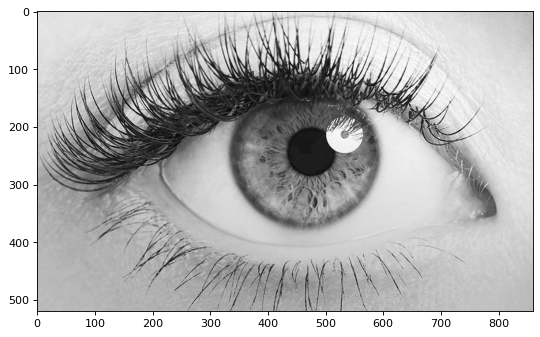

In [ ]:
img_gray = rgb2gray(img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img_gray, cmap='gray');

Calculate the 2-D Fourier Transform of the input image



In [ ]:
def dft_xs(img_gray):
    '''
    Inputs:
        img_gray - Original image size N x N
    Outputs:
        Xs: magnitude spectrum of size N x N
        fs: phase spectrum of size N x N
    '''
    ### Begin

    dft = np.fft.fftshift(cv2.dft(np.float32(img_gray), flags = cv2.DFT_COMPLEX_OUTPUT))
    Xs, fs = cv2.cartToPolar(dft[:,:,0], dft[:,:,1])

    ### End
    return Xs, fs

Calculate the 2-D Inverse Fourier Transform of the input image

In [ ]:
def idft_xs(Xs,fs):
    '''
    Inputs:
        Xs: magnitude spectrum of size N x N
        fs: phase spectrum of size N x N
        
    Outputs:
        img_gray_recon - Original image size N x N
    '''
    ### Begin 

    r, i = cv2.polarToCart(Xs, fs)
    img_gray_recon = cv2.idft(np.fft.ifftshift(cv2.merge([r, i])))
    img_gray_recon = cv2.magnitude(img_gray_recon[:,:,0], img_gray_recon[:,:,1])
    img_gray_recon = cv2.normalize(img_gray_recon, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    ### End
    return img_gray_recon

Low Pass filtering of the image in frequency domain

In [ ]:
def lowpass(img_gray, fc):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fc        - cutoff frequency 
                  - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
           out_img - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Also, use dft_xs() and idft_xs() in the code.
                  
  '''
    ### Begin

  def distance(p1, p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

  def gen_mask_low(img_shape, fc):
    filter = np.zeros(img_shape[:2])
    rows, cols = img_shape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < fc:
                filter[y,x] = 1
    return filter

  Xs, fs = dft_xs(img_gray)
  r, i = cv2.polarToCart(Xs, fs)
  dft = cv2.merge([r, i])

  mask = gen_mask_low(img_gray.shape, fc)
  dft[:,:,0] = dft[:,:,0]*mask
  dft[:,:,1] = dft[:,:,1]*mask
  Xs, fs = cv2.cartToPolar(dft[:,:,0], dft[:,:,1])
  img_out_low = idft_xs(Xs, fs)

    ### End
  return img_out_low

High Pass filtering of the image in frequency domain

In [ ]:
def highpass(img_gray, fc):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fc        - cutoff frequency 
                     - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2

    Outputs:
           out_img - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Use dft_xs() and idft_xs() in the code.
                  
  '''
    ### Begin

  def distance(p1, p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

  def gen_mask_high(img_shape, fc):
    filter = np.zeros(img_shape[:2])
    rows, cols = img_shape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) > fc:
                filter[y,x] = 1
    return filter

  Xs, fs = dft_xs(img_gray)
  r, i = cv2.polarToCart(Xs, fs)
  dft = cv2.merge([r, i])

  mask = gen_mask_high(img_gray.shape, fc)
  dft[:,:,0] = dft[:,:,0]*mask
  dft[:,:,1] = dft[:,:,1]*mask
  Xs, fs = cv2.cartToPolar(dft[:,:,0], dft[:,:,1])
  img_out_high = idft_xs(Xs, fs)

  ### End
  return img_out_high

Band Reject filtering of the image in frequency domain

In [ ]:
def bandreject(img_gray, fL, fH):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fL & fH   - cutoff frequency 
                     - 0 < fL < fH < sqrt(img.shape[0]*img.shape[1])/2

    Outputs:
           out_img - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Use dft_xs() and idft_xs() in the code.
                  
  '''
    ### Begin

  Xs, fs = dft_xs(img_gray)
  r, i = cv2.polarToCart(Xs, fs)
  dft = cv2.merge([r, i])

  imgL = lowpass(img_gray, fL)
  imgH = highpass(img_gray, fH)

  Xs, fs = dft_xs(imgH)
  r, i = cv2.polarToCart(Xs, fs)
  dftH = np.copy(cv2.merge([r, i]))
  Xs, fs = dft_xs(imgL)
  r, i = cv2.polarToCart(Xs, fs)
  dftL = np.copy(cv2.merge([r, i]))

  dft = dftH + dftL
  Xs, fs = cv2.cartToPolar(dft[:,:,0], dft[:,:,1])
  img_out_bandrej = idft_xs(Xs, fs)
    ### End
  return img_out_bandrej

In [ ]:
# Do not change codes inside this cell

img2 = cv2.imread('pic2.jpg', 0)
img2 = rgb2gray(img2)

def plot_frame(gridx, gridy, subplot_id, img, name, axis=False):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    
    if axis == False:
        plt.axis("off")
    plt.title(name)

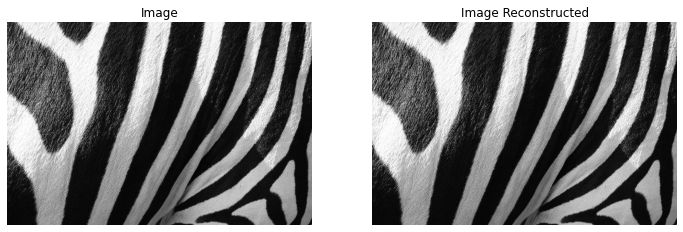

In [ ]:
# Test dft_xs() and idft_xs()
# Make sure the reconstructed image looks similar to the original image

mag_spectrum, phase_spectrum = dft_xs(img2)
noisy_img_recon = idft_xs(mag_spectrum, phase_spectrum)

plt.figure(figsize=(12, 6))
plot_frame(1, 2, 0, img2, "Image")
plot_frame(1, 2, 1, noisy_img_recon, "Image Reconstructed")

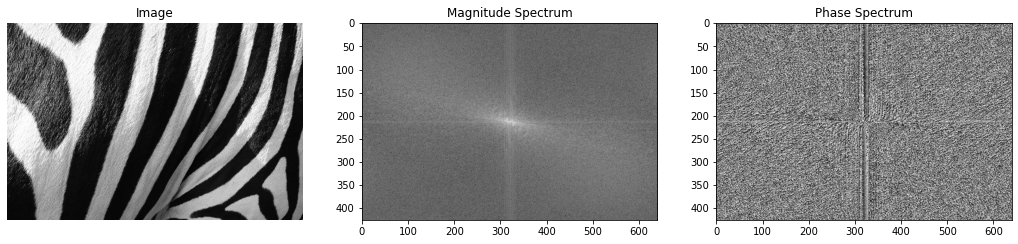

In [ ]:
# Do not change codes inside this cell

mag_spectrum, phase_spectrum = dft_xs(img2)

plt.figure(figsize=(18, 6))
plot_frame(1, 3, 0, img2, "Image")

tmp = np.log(mag_spectrum)
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 1, tmp, "Magnitude Spectrum", axis=True)

tmp = phase_spectrum
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 2, phase_spectrum, "Phase Spectrum", axis=True)

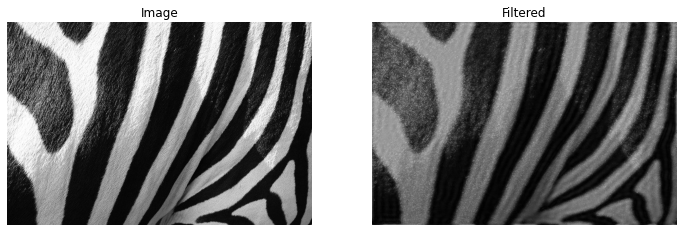

In [ ]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fL and fH for
# a Band reject filter to work subjectively sufficiently

def plot_bandreject_output(fL, fH):
    if fL == ".....":
        fL = 1
        fH = int(img2.shape[0]/2)
        
    img2_filtered = bandreject(img2, fL, fH)
    plt.figure(figsize=(12, 6))
    plot_frame(1, 2, 0, img2, "Image")
    plot_frame(1, 2, 1, img2_filtered, "Filtered")


#############################
# Your part #################
#############################

# Replace with your value for fL and fH
# fL = "....."
# fH = "....."
fL = 40
fH = 110

plot_bandreject_output(fL, fH)

In [ ]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fc for Low Pass and High Pass filters 
# so that the filter:
# 1. covers 25% of the area in magnitude spectrum, call it fc_quart
# 2. covers 50% of the area in magnitude spectrum, call it fc_half

#############################
# Write code here to find out 25% and 50% fc #
#############################
'''
  To create a filter that cover x% of the area in Magnitude Spectrum:
  Area of Specturm: M * N [M is height and N is width]
  Area to be covered: x * M * N / 100
  This area covered is equal to: Pi * fc * fc
  => fc = Root((x*M*N)/(100*Pi))
'''

fc_half = int((img2.shape[0]*img2.shape[1]/(2*np.pi))**0.5)
fc_quart = int((img2.shape[0]*img2.shape[1]/(4*np.pi))**0.5)

### Observations

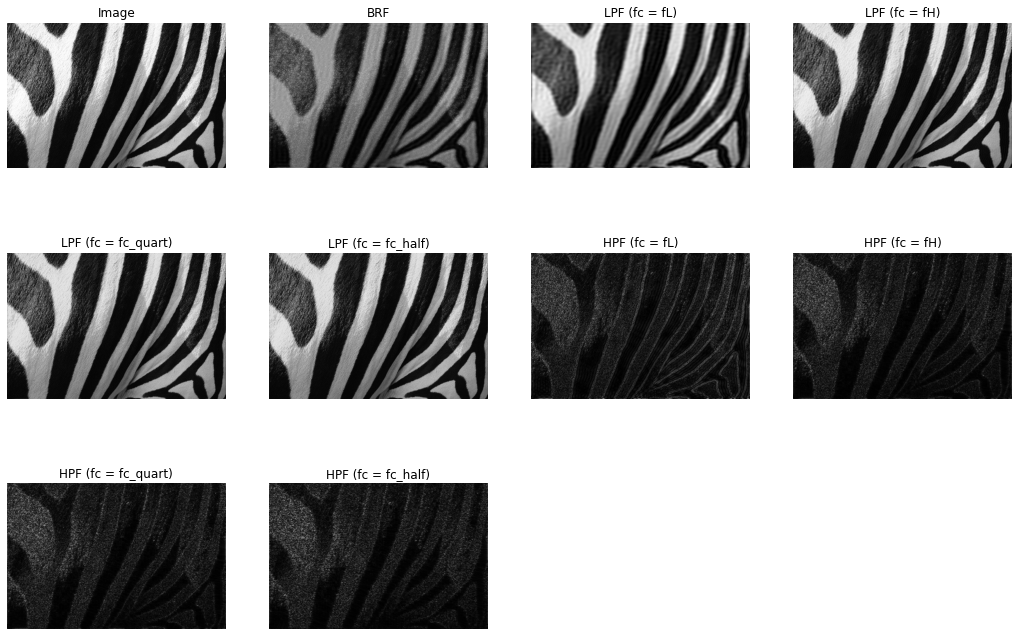

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

plt.figure(figsize=(18, 12))
plot_frame(3, 4, 0, img2, "Image")

tmp = bandreject(img2, fL, fH)
plot_frame(3, 4, 1, tmp, "BRF")

tmp = lowpass(img2, fL)
plot_frame(3, 4, 2, tmp, "LPF (fc = fL)")

tmp = lowpass(img2, fH)
plot_frame(3, 4, 3, tmp, "LPF (fc = fH)")

tmp = lowpass(img2, fc_quart)
plot_frame(3, 4, 4, tmp, "LPF (fc = fc_quart)")

tmp = lowpass(img2, fc_half)
plot_frame(3, 4, 5, tmp, "LPF (fc = fc_half)")

tmp = highpass(img2, fL)
plot_frame(3, 4, 6, tmp, "HPF (fc = fL)")

tmp = highpass(img2, fH)
plot_frame(3, 4, 7, tmp, "HPF (fc = fH)")

tmp = highpass(img2, fc_quart)
plot_frame(3, 4, 8, tmp, "HPF (fc = fc_quart)")

tmp = highpass(img2, fc_half)
plot_frame(3, 4, 9, tmp, "HPF (fc = fc_half)")

In [ ]:
# Add your observations; make sure you compare all the five filtering operations done in the previous cell

your_observation = """
1. Low Pass Filter has a smoothening effect on the image, decreasing fL increases smoothing.
2. Low Pass Filter can be used as blur.
3. High Pass Filter sharpens the image, highlighting the regions of contrast, decreasing fH increases the contrast.
4. High Pass Filter can be used in Edge Detection.
5. Band Pass Filter removes the frequency band specified to it. This can be useful for Noise Removal from Images.

"""

print(your_observation)


1. Low Pass Filter has a smoothening effect on the image.
2. Low Pass Filter can be used as blur.
3. High Pass Filter sharpens the image, highlighting the regions of contrast.
4. High Pass Filter can be used in Edge Detection.
5. Band Pass Filter removes the frequency band specified to it. This can be useful for Noise Removal from Images.


